In [1]:
%matplotlib inline
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [2]:
feeback1="the food was awesome"
feedback2="the food was very good"
blob1=TextBlob(feeback1)
blob2=TextBlob(feedback2)
print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)


In [3]:
#subjectivity tells about personal beleifs.
#subjectivity doesn't tell about any feeling. eg-i believe he went home.

In [4]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

ckey="d5V0kH7UkNqoMqwIRNXqUWG5C"
csecret="zDx34ElAZa0Qt8fDnDtrvIAWwvabuGgS0NVpEDQGHWVDBwO8IT"
atoken="1056887098316222469-URY9Qy2nI9dg3EYUwu0k1myRTf3f9v"
asecret="4oX05VcUHAFpLK1EPHgrGeTu47OsKavXdvbuVaub6TTJm"

auth=tweepy.OAuthHandler(ckey,csecret)
auth.set_access_token=(atoken,asecret)
api=tweepy.API(auth)

enter keyword to search about politics
no of tweets to be analyzed: 100
I present to you one of the best moments of this year! Thank you @mylifemysay for having me facilitate such an inte… https://t.co/UmmEJoxp2d
RT @TheMichaelRock: Don’t let politics ruin Thanksgiving. That’s what your personality is for.
RT @mrjamesob: The denizens of 55 Tufton Street have no business seeking to influence British politics without disclosing who pays their wa…
RT @GeorgeMonbiot: You know that "grassroots organisation" The Taxpayers Alliance (@the_tpa), which claims to represent the ordinary men an…
RT @sphenefan: EXC: Theresa May's husband has 'serious questions to answer' on tax avoidance https://t.co/aZhrE7vTVB via @BIUK_Politics
RT @prakasharige: Pawan Kalyan concluded his Press Meet in Chennai with the following Statement -
In 2019, I am projecting myself as "Chief…
@LadsLasses Re. Politicising football. Alan Lake, who did fund the EDL. Questioned for having an ideological influe… https://t.co/34i

RT @risj_oxford: Applications are now open for our 2019/20 Journalist Fellowship Programme. Fully-funded #Fellowships offer practising jour…
RT @Kevin_Maguire: A Tory leader accusing a Labour leader of playing politics is beyond parody when her every utterance is an attempt to ke…
RT @Kevin_Maguire: A Tory leader accusing a Labour leader of playing politics is beyond parody when her every utterance is an attempt to ke…
RT @maggieNYT: In addition to Whitaker’s $1.2 million personal haul, he may have violated the Hatch Act by taking donations from three poli…
RT @DavidLaufmanLaw: A despicable, embarrassing failure to hold the Saudi government fully accountable for one of the most depraved human r…
RT @Ocasio2018: While we‘re discussing personal finances: Trump’s tax dodges represent millions of dollars taken from schoolchildren, teach…
RT @RhonddaBryant: I have rarely been so angered by an interview as by Amber Rudd on universal credit. The 5 week delay puts vulnerable fam…
RT @CarolLeon

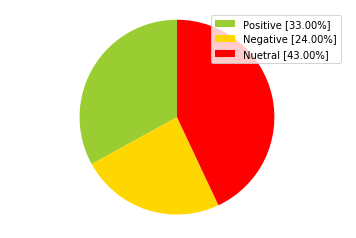

In [12]:
searchterm=input("enter keyword to search about ")
noofsearchterms=int(input("no of tweets to be analyzed: "))
tweets=tweepy.Cursor(api.search,q=searchterm,lang='en').items(noofsearchterms)


positive=0
negative=0
nuetral=0
polarity=0

for tweet in tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        nuetral+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1
    elif(analysis.sentiment.polarity>=0.00):
        positive+=1
positive=percentage(positive,noofsearchterms)
negative=percentage(negative,noofsearchterms)
nuetral=percentage(nuetral,noofsearchterms)

positive=format(positive, '.2f')
negative=format(negative, '.2f')
nuetral=format(nuetral, '.2f')


labels = ['Positive [' + str(positive) + '%]','Negative [' + str(negative) + '%]','Nuetral [' + str(nuetral) + '%]']

sizes=[positive,negative,nuetral]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.axis('equal')
plt.show()

In [13]:
tweetx=tweepy.Cursor(api.search,q=searchterm,lang='English').items(200)
document=[]
for tweet in tweetx:
    document.append(tweet.text)
document
    

['RT @OGR_EN: Critics of #humanrights legalism are right to call for more “pragmatism,” but this must be contextual, looking for advocacy hoo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but it overloo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but it overloo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but it overloo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but it overloo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but it overloo…',
 'RT @JTasioulas: An interesting piece on the need for a multi-dimensional approach to human rights that goes beyond legalism, but

In [7]:
import pandas as pd

In [15]:
df=pd.DataFrame(document)

In [16]:
df.to_csv('testing_data.csv')

In [17]:
df

,0
0,RT @OGR_EN: Critics of #humanrights legalism a...
1,RT @JTasioulas: An interesting piece on the ne...
2,RT @JTasioulas: An interesting piece on the ne...
3,RT @JTasioulas: An interesting piece on the ne...
4,RT @JTasioulas: An interesting piece on the ne...
5,RT @JTasioulas: An interesting piece on the ne...
6,RT @JTasioulas: An interesting piece on the ne...
7,"In #Kenya, #Guatemala and #Brazil, courts have..."
8,RT @JTasioulas: An interesting piece on the ne...
9,RT @OGR_EN: Critics of #humanrights legalism a...
